In [156]:
import pandas as pd 
import numpy as np
import tensorflow
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, Dropout, BatchNormalization, Input, Reshape, Flatten, Deconvolution2D, Conv2DTranspose, MaxPooling2D, UpSampling2D
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import adam
import tensorflow as tf
from tensorflow.keras import layers
keras = tf.keras
AUTOTUNE = tf.data.experimental.AUTOTUNE
from keras.callbacks import TensorBoard
from livelossplot.keras import PlotLossesCallback
import warnings
warnings.filterwarnings("ignore")

from preprocessing import get_images, prep_size_new_data

In [184]:
start = 0
n = 2000
print ('running {} data points.'.format(n))
X_train, X_test, y_train, y_test = get_images(start,n)
Xm_train, Xm_test, ym_train, ym_test, Xf_train, Xf_test, yf_train, yf_test = get_images(start,n, split=True)

running 2000 data points.


# Gender

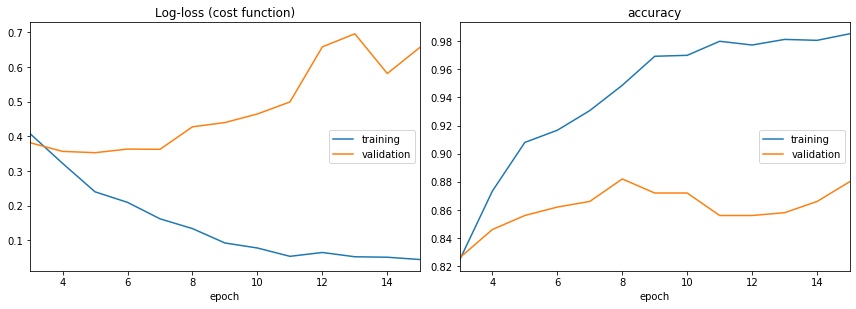

Log-loss (cost function):
training   (min:    0.044, max:    0.670, cur:    0.044)
validation (min:    0.353, max:    0.696, cur:    0.657)

accuracy:
training   (min:    0.581, max:    0.985, cur:    0.985)
validation (min:    0.602, max:    0.882, cur:    0.880)
CPU times: user 17min 18s, sys: 3min 32s, total: 20min 51s
Wall time: 3min 51s


In [43]:
%%time

print('Training gender model! (might take a while)')
cnn_g = Sequential()
input_img = (218, 178, 3)
batch_size=32
epochs=15

# layer 1
cnn_g.add(Conv2D(2, (3, 3), activation='relu', padding='same', input_shape=input_img))
cnn_g.add(Conv2D(2, (3, 3), activation='relu', padding='same'))
cnn_g.add(MaxPooling2D((2, 2), strides=(2,2)))
# layer 2
cnn_g.add(Conv2D(4, (3, 3), activation='relu', padding='same'))
cnn_g.add(Conv2D(4, (3, 3), activation='relu', padding='same'))
cnn_g.add(MaxPooling2D((2, 2), strides=(2,2)))
# layer 3
cnn_g.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
cnn_g.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
cnn_g.add(MaxPooling2D((2, 2), strides=(2,2)))
# flatten and add 3 FC layers
cnn_g.add(Flatten())
cnn_g.add(Dense(64, activation='relu'))
cnn_g.add(Dropout(0.5))
cnn_g.add(Dense(1, activation='sigmoid'))

cnn_g.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_g.fit(X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_test, y_test),
        callbacks=[PlotLossesCallback()],
        verbose=1)

# Male Attraction

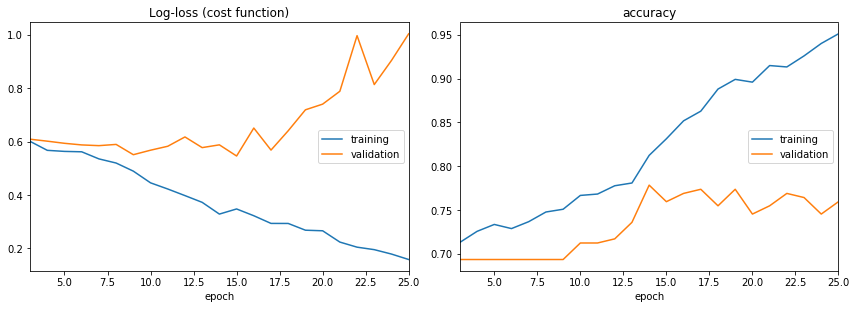

Log-loss (cost function):
training   (min:    0.158, max:    0.685, cur:    0.158)
validation (min:    0.546, max:    1.004, cur:    1.004)

accuracy:
training   (min:    0.659, max:    0.951, cur:    0.951)
validation (min:    0.693, max:    0.778, cur:    0.759)
CPU times: user 11min 7s, sys: 1min 45s, total: 12min 52s
Wall time: 2min 29s


In [13]:
%%time

print('Training gender model! (might take a while)')
cnn_m = Sequential()
input_img = (218, 178, 3)
batch_size=32
epochs=25

# layer 1
cnn_m.add(Conv2D(2, (3, 3), activation='relu', padding='same', input_shape=input_img))
cnn_m.add(Conv2D(2, (3, 3), activation='relu', padding='same'))
cnn_m.add(MaxPooling2D((2, 2), strides=(2,2)))
# layer 2
cnn_m.add(Conv2D(4, (3, 3), activation='relu', padding='same'))
cnn_m.add(Conv2D(4, (3, 3), activation='relu', padding='same'))
cnn_m.add(MaxPooling2D((2, 2), strides=(2,2)))
# flatten and add 3 FC layers
cnn_m.add(Flatten())
cnn_m.add(Dense(64, activation='relu'))
cnn_m.add(Dropout(0.5))
cnn_m.add(Dense(32, activation='relu'))
cnn_m.add(Dropout(0.5))
cnn_m.add(Dense(1, activation='sigmoid'))

cnn_m.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_m.fit(Xm_train, ym_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(Xm_test, ym_test),
        callbacks=[PlotLossesCallback()],
        verbose=1)

# Female Attraction

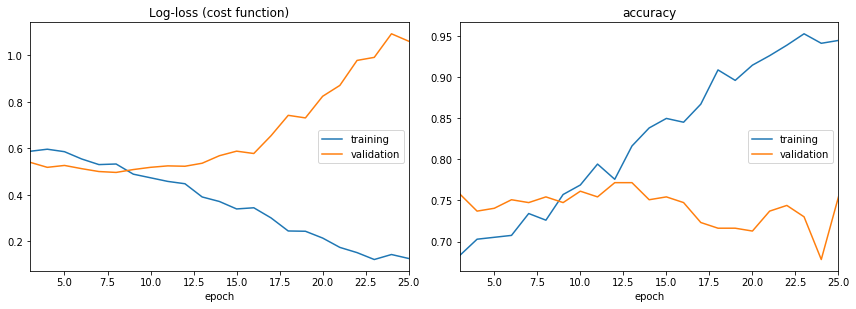

Log-loss (cost function):
training   (min:    0.122, max:    0.646, cur:    0.127)
validation (min:    0.497, max:    1.093, cur:    1.061)

accuracy:
training   (min:    0.674, max:    0.953, cur:    0.945)
validation (min:    0.678, max:    0.772, cur:    0.754)
CPU times: user 16min 22s, sys: 3min 17s, total: 19min 39s
Wall time: 3min 41s


In [19]:
%%time

print('Training gender model! (might take a while)')
cnn_f = Sequential()
input_img = (218, 178, 3)
batch_size=32
epochs=25

# layer 1
cnn_f.add(Conv2D(2, (3, 3), activation='relu', padding='same', input_shape=input_img))
cnn_f.add(Conv2D(2, (3, 3), activation='relu', padding='same'))
cnn_f.add(MaxPooling2D((2, 2), strides=(2,2)))
# layer 2
cnn_f.add(Conv2D(4, (3, 3), activation='relu', padding='same'))
cnn_f.add(Conv2D(4, (3, 3), activation='relu', padding='same'))
cnn_f.add(MaxPooling2D((2, 2), strides=(2,2)))
# layer 3
cnn_f.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
cnn_f.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
cnn_f.add(MaxPooling2D((2, 2), strides=(2,2)))
# flatten and add 3 FC layers
cnn_f.add(Flatten())
cnn_f.add(Dense(64, activation='relu'))
cnn_f.add(Dropout(0.5))
cnn_f.add(Dense(1, activation='sigmoid'))

cnn_f.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_f.fit(Xf_train, yf_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(Xf_test, yf_test),
        callbacks=[PlotLossesCallback()],
        verbose=1)

In [65]:
Xf_test[:1].shape

(1, 218, 178, 3)

In [68]:
cnn_f.predict_proba(Xf_test[:1])

array([[0.8746116]], dtype=float32)

In [50]:
yf_test

578     0
781     0
189     1
889     1
268     1
678     1
1939    0
1017    1
546     0
516     0
1811    1
1144    1
1066    1
1517    1
1057    0
749     0
102     1
1609    1
1745    1
1497    1
1042    1
564     1
138     1
25      1
474     1
806     0
1087    0
1435    1
724     0
1735    1
       ..
1776    0
1276    1
1504    1
1131    1
1090    1
960     1
507     1
176     1
1153    1
1657    1
776     1
1795    1
1297    1
477     1
809     1
1736    1
873     1
1534    1
838     1
588     1
573     1
1519    0
987     0
486     1
739     1
946     0
178     1
869     1
780     1
289     1
Name: attractive, Length: 289, dtype: int64

In [69]:
def male_female_split(full_images, df):
    '''
    Splits images and df labels to train and testing set based on gender
    Input: 2 int
    Output: Train 2d array / Series
    '''
    full_males = full_images[df[df.male==1].index]
    y_male = df.attractive[df[df.male==1].index]
    full_females = full_images[df[df.male==0].index]
    y_female = df.attractive[df[df.male==0].index]
    Xm_train, Xm_test, ym_train, ym_test = train_test_split(full_males, y_male)
    Xf_train, Xf_test, yf_train, yf_test = train_test_split(full_females, y_female)
    return Xm_train, Xm_test, ym_train, ym_test, Xf_train, Xf_test, yf_train, yf_test

In [ ]:
Xm_train, Xm_test, ym_train, ym_test, Xf_train, Xf_test, yf_train, yf_test = male_female_split(full_images, df)

In [70]:
from preprocessing import get_and_clean_data

In [150]:
full_images, df = get_and_clean_data(0,50)

In [148]:
df[df.male==1].index

Int64Index([2, 6, 7, 11, 12, 14, 15, 19, 20, 22, 24, 29, 31, 32, 35, 36, 37,
            40, 47, 48, 49],
           dtype='int64')

In [151]:
full_images[df[df.male==1].index]

TypeError: list indices must be integers or slices, not Int64Index

In [134]:
full_images[1]

array([[[ 67,  52,  45],
        [ 65,  50,  43],
        [ 65,  50,  43],
        ...,
        [ 76,  73,  68],
        [ 82,  79,  74],
        [ 84,  81,  74]],

       [[ 67,  52,  45],
        [ 65,  50,  43],
        [ 65,  50,  43],
        ...,
        [ 76,  73,  68],
        [ 82,  79,  74],
        [ 84,  81,  74]],

       [[ 67,  52,  47],
        [ 65,  50,  45],
        [ 65,  50,  43],
        ...,
        [ 76,  73,  68],
        [ 82,  79,  74],
        [ 84,  81,  74]],

       ...,

       [[211, 211, 221],
        [221, 221, 231],
        [221, 221, 229],
        ...,
        [123,  92,  87],
        [139, 116, 110],
        [146, 129, 122]],

       [[227, 225, 236],
        [222, 220, 231],
        [215, 214, 222],
        ...,
        [138, 103,  99],
        [142, 117, 112],
        [138, 119, 112]],

       [[227, 225, 236],
        [222, 220, 231],
        [215, 214, 222],
        ...,
        [141, 106, 100],
        [144, 116, 112],
        [139, 119, 112]]

In [154]:
cnn_g = load_model('../saved_models/gender2_11_10.h5')
cnn_m = load_model('../saved_models/male2_att_11_10.h5')
cnn_f = load_model('../saved_models/female2_att_11_10.h5')

In [165]:
n=4
X = prep_size_new_data(n-1,n)
pred = cnn_g.predict_proba(X)
print('By Western standards, the picture you submitted is {} a male. (scale: 0-1)'.format(pred[0]))
cnn_g.predict_classes(X)[0][0]

By Western standards, the picture you submitted is [0.00947106] a male. (scale: 0-1)


0

In [201]:
cnn_g = load_model('../saved_models/gender4_11_10.h5')
cnn_g.evaluate(X_train, y_train)

1500/1500 [==============================] - 6s 4ms/step


[0.23485206207388545, 0.9539999961853027]

In [208]:
cnn_m = load_model('../saved_models/male_att_11_10.h5')
boy1 = cnn_m.evaluate(Xf_train, yf_train)
cnn_m = load_model('../saved_models/male2_att_11_10.h5')
boy2 = cnn_m.evaluate(Xf_train, yf_train)
cnn_m = load_model('../saved_models/male3_att_11_10.h5')
boy3 = cnn_m.evaluate(Xf_train, yf_train)
cnn_m = load_model('../saved_models/male4_att_11_10.h5')
boy4 = cnn_m.evaluate(Xf_train, yf_train)
print(boy1, boy2, boy3, boy4)

865/865 [==============================] - 3s 3ms/step
[3.4524755869313775, 0.544508695602417] [9.55755979063883, 0.2924855351448059] [12.381105255391557, 0.28092485666275024] [14.897130979416687, 0.2832369804382324]


In [207]:
cnn_f = load_model('../saved_models/female_att_11_10.h5')
girl1 = cnn_f.evaluate(Xf_train, yf_train)
cnn_f = load_model('../saved_models/female2_att_11_10.h5')
girl2 = cnn_f.evaluate(Xf_train, yf_train)
cnn_f = load_model('../saved_models/female3_att_11_10.h5')
girl3 = cnn_f.evaluate(Xf_train, yf_train)
cnn_f = load_model('../saved_models/female4_att_11_10.h5')
girl4 = cnn_f.evaluate(Xf_train, yf_train)
print(girl1, girl2, girl3, girl4)

865/865 [==============================] - 3s 3ms/step
[2.3107587894263295, 0.4647398889064789] [8.285277738185288, 0.28901734948158264] [18.66490433092062, 0.285549134016037] [19.41448293696938, 0.28786125779151917]


In [206]:
print(girl1, girl2, girl3, girl4)

[19.41448293696938, 0.28786125779151917] [8.285277738185288, 0.28901734948158264] [18.66490433092062, 0.285549134016037] [19.41448293696938, 0.28786125779151917]
